In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

CSV_col_name=['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
data=pd.read_csv('/content/drive/My Drive/Bike Sharing_day.csv',names=CSV_col_name, header=0)

data_frame = pd.DataFrame(data,columns=CSV_col_name)
df = pd.DataFrame(data,columns=CSV_col_name)
display(data_frame)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [ ]:
data_y= data_frame.pop('cnt')  #data_y is  y matrix ..... data_frame is x matrix
data_y.shape
display(data_y)

data_frame.shape

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

(730, 15)

In [ ]:
list_to_pop=['instant','dteday','casual','registered']


[data_frame.pop(col) for col in list_to_pop]
[df.pop(col) for col in list_to_pop]


without_dummy_df = pd.get_dummies(df, columns=['mnth','weathersit','season','weekday'])
df_res = pd.get_dummies(without_dummy_df, drop_first=True)
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   mnth_1        730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

In [ ]:
import matplotlib.pyplot as plt

corrMatrix =df_res.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
#transform data
min_max_scaled = scaler.fit_transform(df_res)
print(min_max_scaled)


MinMax_DataFrame= pd.DataFrame(min_max_scaled,columns =df_res.columns)


y = MinMax_DataFrame.pop('cnt')
X=MinMax_DataFrame
X_train_mm,X_test_mm,y_train_mm,y_test_mm = train_test_split(X,y,test_size=0.1,random_state=0)




[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


In [ ]:
from keras import backend as K

def r2_score_(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred)) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.47621652483940125; mse of 27.447697520256042%
[0.28599920868873596, 0.28599923849105835, 0.28599920868873596, 0.28599923849105835, 0.28599920868873596, 0.28599920868873596, 0.28599920868873596, 0.28599923849105835, 0.2859991788864136, 0.28599920868873596, 0.28599923849105835, 0.2859991788864136, 0.28599920868873596, 0.28599920868873596, 0.28599923849105835, 0.28599920868873596, 0.2859991788864136, 0.2859991788864136, 0.28599923849105835, 0.28599920868873596, 0.2859991788864136, 0.2859991788864136, 0.28599920868873596, 0.2859991788864136, 0.28599926829338074, 0.28599926829338074, 0.28599923849105835, 0.28599920868873596, 0.28599920868873596, 0.28599920868873596] [0.4858114719390869, 0.48581141233444214, 0.48581141233444214, 0.48581141233444214, 0.48581141233444214, 0.48581141233444214, 0.4858114719390869, 0.4858115315437317, 0.4858114719390869, 0.4858114719390869,

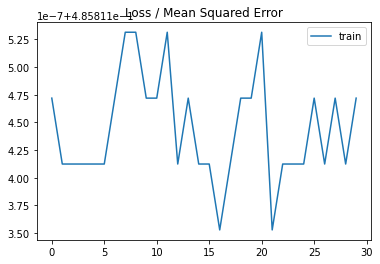

------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.49590715765953064; mse of 29.47830557823181%
[0.2809227406978607, 0.28092271089553833, 0.28092268109321594, 0.28092268109321594, 0.28092271089553833, 0.28092268109321594, 0.28092271089553833, 0.2809227406978607, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092271089553833, 0.28092268109321594, 0.28092268109321594, 0.28092265129089355, 0.28092268109321594, 0.28092268109321594, 0.2809227406978607, 0.28092271089553833, 0.28092271089553833, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594, 0.28092268109321594] [0.480888694524765, 0.4808887839317322, 0.4808887839317322, 0.48088884353637695, 0.48088884353637695, 0.4808887839317322, 0.4808887243270874, 0.4808887839317322, 0.4808887839317322, 0.4808887243270874, 

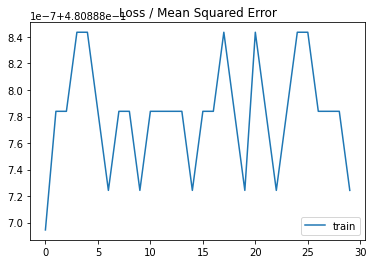

------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.48400115966796875; mse of 28.365588188171387%
[0.2837045192718506, 0.2837044894695282, 0.2837044596672058, 0.2837044596672058, 0.2837044596672058, 0.2837044894695282, 0.2837044894695282, 0.2837044596672058, 0.2837044894695282, 0.2837044894695282, 0.2837044596672058, 0.2837044894695282, 0.2837045192718506, 0.2837044894695282, 0.2837044596672058, 0.2837045192718506, 0.2837045192718506, 0.2837045192718506, 0.2837044894695282, 0.2837044894695282, 0.2837045192718506, 0.2837044894695282, 0.2837044894695282, 0.2837044894695282, 0.2837044894695282, 0.2837044596672058, 0.2837044894695282, 0.2837044894695282, 0.2837044894695282, 0.2837044894695282] [0.4838652014732361, 0.48386529088020325, 0.48386523127555847, 0.48386529088020325, 0.48386523127555847, 0.48386523127555847, 0.48386529088020325, 0.48386523127555847, 0.48386529088020325, 0.48386529088020325, 0.4838652908802032

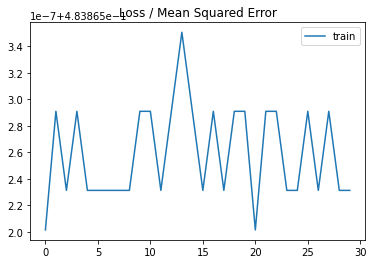

------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.48706963658332825; mse of 28.217744827270508%
[0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.284074068069458, 0.2840741276741028, 0.2840741276741028, 0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.284074068069458, 0.2840740978717804, 0.284074068069458, 0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.2840741276741028, 0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.2840740978717804, 0.284074068069458, 0.2840741276741028, 0.284074068069458, 0.284074068069458, 0.2840740978717804, 0.2840740978717804, 0.284074068069458, 0.2840741276741028, 0.284074068069458] [0.4830981194972992, 0.48309817910194397, 0.4830981194972992, 0.4830981194972992, 0.4830981194972992, 0.48309817910194397, 0.4830981194972992, 0.4830981194972992, 0.48309817910194397, 0.4830981194972992, 0.4830981194972992, 0.4830981194

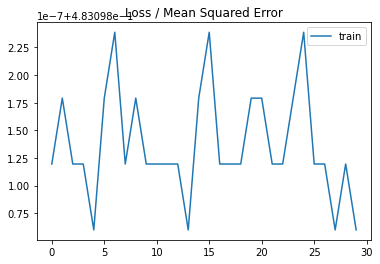

------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.4762677848339081; mse of 28.338047862052917%
[0.2837733030319214, 0.2837733328342438, 0.2837733328342438, 0.2837733328342438, 0.28377336263656616, 0.2837733030319214, 0.2837733328342438, 0.2837733328342438, 0.2837733030319214, 0.2837733328342438, 0.28377336263656616, 0.2837733328342438, 0.2837733030319214, 0.2837733328342438, 0.2837733030319214, 0.2837733328342438, 0.2837733328342438, 0.2837733328342438, 0.2837733030319214, 0.2837733030319214, 0.28377336263656616, 0.2837733328342438, 0.2837733030319214, 0.2837733328342438, 0.28377336263656616, 0.2837733030319214, 0.2837733328342438, 0.2837733328342438, 0.28377336263656616, 0.2837733328342438] [0.4857986569404602, 0.4857986569404602, 0.48579856753349304, 0.485798716545105, 0.4857986271381378, 0.48579856753349304, 0.4857986271381378, 0.4857986271381378, 0.4857986569404602, 0.4857986271381378, 0.4857986569404602, 0.

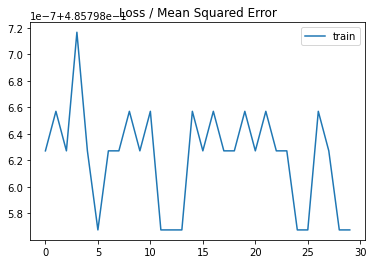

-------------------------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.48179587721824646; mse of 28.256455063819885%
[0.284824937582016, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.2848249673843384, 0.2848249673843384, 0.28482499718666077, 0.28482499718666077, 0.2848249673843384, 0.2848249673843384, 0.2848249673843384, 0.2848249673843384, 0.2848249673843384, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.28482499718666077, 0.2848249673843384, 0.28482499718666077, 0.2848249673843384, 0.2848249673843384, 0.2848249673843384] [0.4859890043735504, 0.4859890341758728, 0.4859890043735504, 0.4859890043735504, 0.4859890043735504, 0.4859890341758728

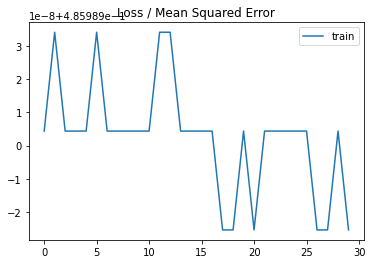

------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4859890043735504; mse of 28.482499718666077%
[0.28256452083587646, 0.28256455063819885, 0.28256452083587646, 0.28256452083587646, 0.28256455063819885, 0.28256455063819885, 0.28256458044052124, 0.28256452083587646, 0.28256458044052124, 0.28256455063819885, 0.28256458044052124, 0.28256455063819885, 0.28256455063819885, 0.28256452083587646, 0.28256458044052124, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256452083587646, 0.28256455063819885, 0.28256455063819885, 0.28256455063819885, 0.28256458044052124, 0.28256455063819885] [0.48179587721824646, 0.48179587721824646, 0.48179587721824646, 0.4817958474159241, 0.4817958474159241, 0.4817958474159241, 0.48179593682289124, 0.48179587721824646, 0.48179587721824646, 0.4817958474

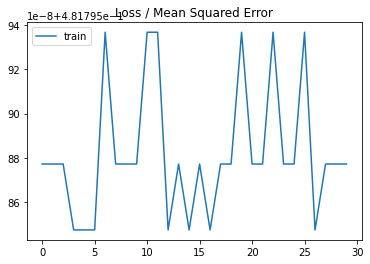

-------------------------------------------------------------------------------------------


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error

from keras import metrics


def kfold_crossvalidation(X_train_mm,X_test_mm,y_train_mm, y_test_mm,N_spilit,NofN,epochs_,dim,loss_,opmtimizer_):
  inputs = np.concatenate((X_train_mm,X_test_mm), axis=0)
  targets = np.concatenate((y_train_mm, y_test_mm), axis=0)
  acc_per_fold=[]
  loss_per_fold=[]
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=N_spilit, shuffle=True)

  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    # Define the model architecture


    model=Sequential()
    model.add(Dense(NofN, input_dim=dim, activation='relu'))#input layer
    model.add(Dense(NofN, activation='relu')) #hidden layer
    model.add(Dropout(0.2))#dropout 
    model.add(Dense(NofN, activation='relu')) #hidden layer
    model.add(Dropout(0.2))#dropout
    model.add(Dense(1, activation='softmax',kernel_initializer='normal')) #output layer
    # Compile the model
   
    model.compile(loss=loss_, optimizer=opmtimizer_,metrics=['mse', 'mae', 'mape'])
  


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],epochs=epochs_, batch_size=30, verbose = 0)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    y_pred= model.predict(X_test_mm)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    print(history.history['mse'],history.history['mae'],history.history['mape'],history.history['loss'])
    

    pyplot.title('Loss / Mean Squared Error') 
    pyplot.plot(history.history['loss'], label='train')
  
    pyplot.legend()
    pyplot.show()
   
   

    # Increase fold number
    fold_no = fold_no + 1



kfold_crossvalidation(X_train_mm,X_test_mm,y_train_mm, y_test_mm,5,30,30,33,'mean_absolute_error','adam')

print("-------------------------------------------------------------------------------------------")

kfold_crossvalidation(X_train_mm,X_test_mm,y_train_mm, y_test_mm,2,60,30,33,'mean_absolute_error','adam')

print("-------------------------------------------------------------------------------------------")

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 28.8 MB/s 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import shap

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


def base_model():
    model = Sequential()        
    model.add(Dense(60, input_dim=33, activation='relu'))#input layer
    model.add(Dense(60, activation='relu')) #hidden layer
    model.add(Dropout(0.2))#dropout 
    model.add(Dense(60, activation='relu')) #hidden layer
    model.add(Dropout(0.2))#dropout
    model.add(Dense(1, activation='softmax',kernel_initializer='normal')) #output layer
    # Compile the model
    model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mse', 'mae', 'mape'])
    return model

X = X_test_mm
y = y_test_mm

my_model = KerasRegressor(build_fn=base_model)
my_model.fit(X_train_mm,y_train_mm)



perm = PermutationImportance(my_model, random_state=0).fit(X, y)


eli5.show_weights(perm, feature_names = X_train_mm.columns.tolist())



KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


3/3 [==============================] - 0s 3ms/step - loss: 0.4767 - mse: 0.2924 - mae: 0.4767 - mape: 184.9771


invalid value encountered in double_scalars


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install clone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.base import clone
from scikeras.wrappers import KerasRegressor

def drop_col(X_train, y_train):
  global model1
  model_clone = clone(model1)
  model_clone.random_state = 123
  model_clone.verbose = 0
  model_clone.fit(X_train, y_train)
  benchmark_score = model_clone.score(X_train,y_train)
  importances = []
  for col in X_train.columns:
    model_clone= KerasRegressor(model = base_model(), epochs=5, batch_size=10)
    model_clone.random_state = 0
    model_clone.fit(X_train.drop(col,axis = 1), y_train)
    drop_col_score = model_clone.score(X_train.drop(col, axis =1), y_train)
    importances.append(benchmark_score - drop_col_score)
  importances_df = pd.DataFrame(importances, X_train.columns)
  #print(importances_df)
  return importances_df



#X= X_test_mm
#y= y_test_mm

#my_model = KerasRegressor(build_fn=base_model)    
#my_model.fit(X_train_mm,y_train_mm)
model = KerasRegressor(build_fn=base_model(), epochs=1, batch_size=10, verbose=1)
model.fit(X_train_mm,y_train_mm)
f = drop_col(X_train_mm, y_train_mm)
f

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


3/3 [==============================] - 0s 4ms/step - loss: 0.4767 - mse: 0.2924 - mae: 0.4767 - mape: 184.9771


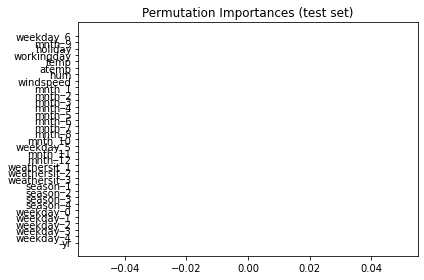

'\n\nmy_model = KerasRegressor(build_fn=base_model)    \nmy_model.fit(X,y)\n\nperm = PermutationImportance(my_model, random_state=1).fit(X,y)\neli5.show_weights(perm, feature_names = X.columns.tolist())\n\n\n\n\nfor i in perm.importances_mean.argsort()[::-1]:\n     if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:\n         print(f"{X_train_mm.columns[i]:<8}"\n               f"{perm.importances_mean[i]:.3f}"\n               f" +/- {perm.importances_std[i]:.3f}")\n\n'

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from eli5.sklearn import PermutationImportance



def base_model():
  my_model = Sequential()
  my_model.add(Dense(60, input_dim=33, activation='relu'))#input layer
  my_model.add(Dense(60, activation='relu')) #hidden layer
  my_model.add(Dropout(0.2))#dropout 
  my_model.add(Dense(60, activation='relu')) #hidden layer
  my_model.add(Dropout(0.2))#dropout
  my_model.add(Dense(1, activation='softmax',kernel_initializer='normal')) #output layer
  # Compile the model
  my_model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])
  my_model.fit(X_train_mm,y_train_mm)
  return my_model
X= X_test_mm
y= y_test_mm

my_model1 = KerasRegressor(build_fn=base_model)    
my_model.fit(X_train_mm,y_train_mm)





result = permutation_importance(my_model, X_test_mm, y_test_mm, random_state=42)


X_train_mm1 = pd.DataFrame(X_train_mm)
y_train_mm1 = pd.DataFrame(y_train_mm)


sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_train_mm1.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()



for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
         print(f"{X_train_mm1.columns[i]:<8}"
               f"{result.importances_mean[i]:.3f}"
               f" +/- {result.importances_std[i]:.3f}")

















'''

my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())




for i in perm.importances_mean.argsort()[::-1]:
     if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
         print(f"{X_train_mm.columns[i]:<8}"
               f"{perm.importances_mean[i]:.3f}"
               f" +/- {perm.importances_std[i]:.3f}")

'''
              

Its about the permutation importance.we can see the result. 

In [ ]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=959acd4698fb9d8d058cbaa381f970093e32a86aa5ea3ac1c40b09deb909a798
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import metrics


# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

#define a LGBM regressor
model_lgbm = LGBMRegressor()
#fit the regressor
model_lgbm.fit(X_train_mm, y_train_mm)
print(); print(model)
#create a pipline
pip = Pipeline(
    [
        ('Regressor',model_lgbm ),
    ]
)
pip.fit(X_train_mm, y_train_mm)
print(pip.score(X_train_mm, y_train_mm))
print(pip.score(X_test_mm, y_test_mm))


KerasRegressor(
	model=None
	build_fn=<keras.engine.sequential.Sequential object at 0x7f274d47d8d0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)
0.9768067190935192
0.9076749872919471


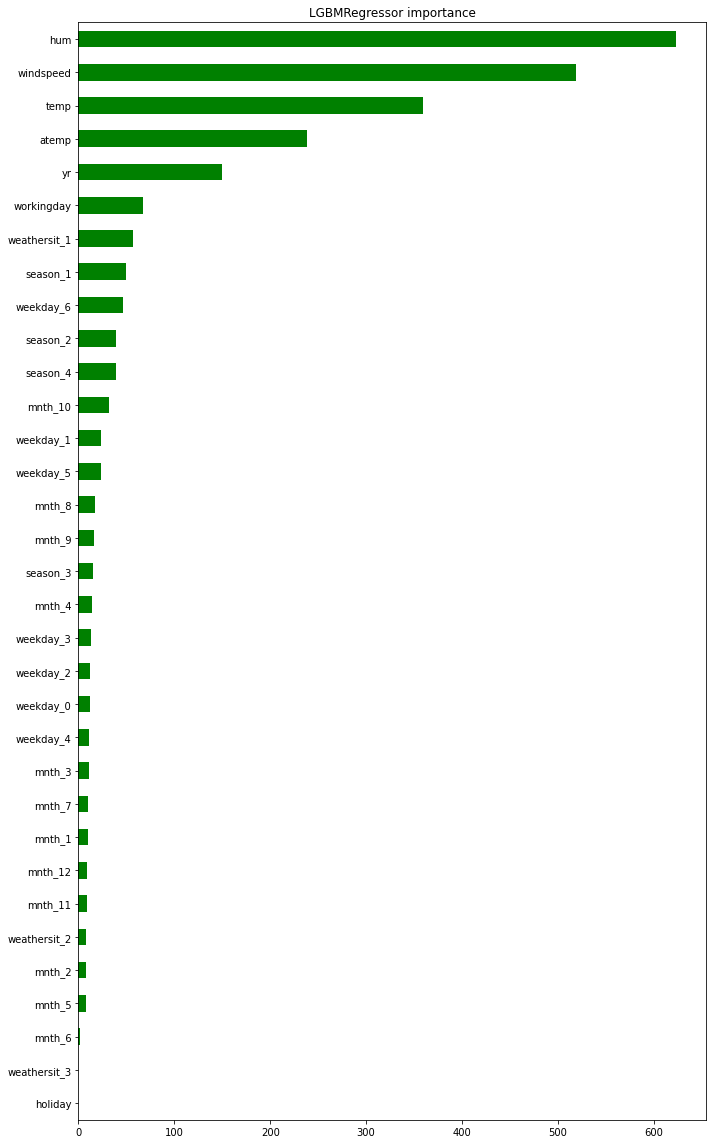

In [ ]:
feature_names = X_train_mm.columns

mdi_importances = pd.Series(
    pip[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh(figsize=(10,16),color='green',linestyle = 'dashed')
ax.set_title("LGBMRegressor importance")
ax.figure.tight_layout()

we can see that in the bar chart the 4 important covariarte humidity, windspeed temp and atemp and less importan is holiday and weathersit_3.

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 30.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7835dbc84f0c4f121ee2bd0de48a60aff47270b0f059ff8c98a8c52c7118b0ae
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from sklearn import datasets, ensemble, model_selection

from sklearn.ensemble import RandomForestRegressor


model_lgbm1 = LGBMRegressor()
#fit the regressor
model_lgbm1.fit(X_train_mm, y_train_mm)
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_mm.values, feature_names=X_train_mm.columns.values.tolist(),
                                                  class_names=['cnt'], verbose=True, mode='regression')


# Choose the 5th instance and use it to predict the results
j = 7
exp = explainer.explain_instance(X_test_mm.values[j], model_lgbm1.predict, num_features=33)
# Show the predictions
exp.show_in_notebook(show_table=True)

Intercept 0.3797425253406189
Prediction_local [0.57025232]
Right: 0.7695399996781559


In [ ]:
exp.as_list()

[('0.00 < yr <= 1.00', 0.2431514493057318),
 ('hum > 0.75', -0.0911375089592754),
 ('season_1 <= 0.00', 0.07000765132016401),
 ('0.34 < temp <= 0.54', -0.04214179588952627),
 ('mnth_9 <= 0.00', -0.03205609206879138),
 ('weekday_6 <= 0.00', -0.031032186857057217),
 ('season_4 > 0.00', 0.02739660763487503),
 ('0.00 < weathersit_1 <= 1.00', 0.022510707383484575),
 ('mnth_10 <= 0.00', -0.013468287741848023),
 ('weekday_1 <= 0.00', 0.012351606188165318),
 ('mnth_8 <= 0.00', 0.012318373199303127),
 ('0.00 < workingday <= 1.00', 0.011968023797909634),
 ('holiday <= 0.00', -0.011653145263626747),
 ('mnth_4 <= 0.00', 0.010602857438035651),
 ('0.23 < windspeed <= 0.32', 0.00982192535382228),
 ('mnth_11 <= 0.00', 0.009558712325392356),
 ('weekday_4 <= 0.00', -0.009457605300530676),
 ('0.34 < atemp <= 0.53', -0.009098824859590753),
 ('weekday_5 <= 0.00', -0.009056771025403042),
 ('weekday_0 <= 0.00', 0.00814255057366725),
 ('weathersit_3 <= 0.00', 0.008111795547353527),
 ('season_2 <= 0.00', 0.006

In [ ]:
# Choose the 20th instance and use it to predict the results
j = 8
exp = explainer.explain_instance(X_test_mm.values[j], model_lgbm1.predict, num_features=33)

Intercept 0.33206436128335026
Prediction_local [0.7612506]
Right: 0.7127466131748926


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('0.00 < yr <= 1.00', 0.2362397112210193),
 ('0.54 < temp <= 0.74', 0.12547593429666526),
 ('season_1 <= 0.00', 0.06894402240801394),
 ('hum <= 0.53', 0.04773164530381882),
 ('mnth_9 <= 0.00', -0.037764699232803414),
 ('season_4 <= 0.00', -0.029712432121116888),
 ('0.00 < weathersit_1 <= 1.00', 0.0285509535537013),
 ('weekday_6 <= 0.00', -0.023651382224972397),
 ('mnth_10 <= 0.00', -0.022814183064001067),
 ('0.53 < atemp <= 0.69', 0.02273078877159789),
 ('weathersit_3 <= 0.00', 0.020198864051274062),
 ('mnth_4 > 0.00', -0.012719835169670925),
 ('mnth_5 <= 0.00', -0.012263217893287732),
 ('workingday <= 0.00', -0.012224065715500073),
 ('weekday_0 > 0.00', -0.009660240168939193),
 ('mnth_8 <= 0.00', 0.008955551863960099),
 ('mnth_6 <= 0.00', 0.007873096265829483),
 ('0.32 < windspeed <= 0.43', 0.007810564009992595),
 ('mnth_2 <= 0.00', 0.00765584739165235),
 ('weekday_5 <= 0.00', -0.007376168420140032),
 ('weekday_1 <= 0.00', 0.006939440824862903),
 ('mnth_11 <= 0.00', 0.006177405331528

In [ ]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor


print("Training LightGBMRegressor...")
tic = time()

est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train_mm, y_train_mm)

print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test_mm, y_test_mm):.2f}")

Training LightGBMRegressor...


n_quantiles (1000) is greater than the total number of samples (657). n_quantiles is set to n_samples.


done in 0.305s
Test R2 score: 0.85


Computing partial dependence plots...
done in 4.006s


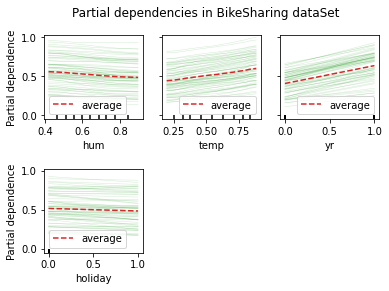

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 0,
}
features=["hum", "temp", "yr","holiday"]
print("Computing partial dependence plots...")
#tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train_mm,
    features,
    kind="both",
    subsample=70,
    n_jobs=4,
    grid_resolution=40,
    random_state=0,
    ice_lines_kw={"color": "tab:green", "alpha": 0.2, "linewidth": 0.5},
     pd_line_kw={"color": "tab:red", "linestyle": "--"}
 
   
)

print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle("Partial dependencies in BikeSharing dataSet")
display.figure_.subplots_adjust(hspace=0.6)
